# Домашнее задание № 6
### Выполнил: Кузнецов С.И.

## Задание 1
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.


In [1]:
import pandas as pd

In [2]:
# Загружаем файл 'keywords.csv'

keywords = pd.read_csv('keywords.csv')
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [3]:
def geo_classification(row, geo_data):
    '''
    Распределяет запросы по регионам в соответствии со словарем geo_data.
    '''
    
    for region, cities in geo_data.items():
        for city in cities:
            if city.strip().lower() in row.keyword.lower():
                return region
    
    return 'undefined'    

In [4]:
# Загружаем правила распределения по регионам

geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

geo_data

{'Центр': ['москва', 'тула', 'ярославль'],
 'Северо-Запад': ['петербург', 'псков', 'мурманск'],
 'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']}

In [5]:
# Добавляем результат классификации в столбец "region"

keywords['region'] = keywords.apply(geo_classification, geo_data = geo_data, axis = 1)
keywords.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [6]:
keywords.region.value_counts()

undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64

## Задание 2
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
    - оценка 2 и меньше - низкий рейтинг
    - оценка 4 и меньше - средний рейтинг
    - оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [7]:
# Загружаем файл с рейтингами

ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [8]:
def rating_classification(row):
    '''
    классифицирует фильмы из материалов занятия по следующим правилам:

    - оценка 2 и меньше - низкий рейтинг
    - оценка 4 и меньше - средний рейтинг
    - оценка 4.5 и 5 - высокий рейтинг
    '''
    if row.rating <= 2:
        return 'низкий рейтинг'
    if row.rating <= 4:
        return 'средний рейтинг'
    return 'высокий рейтинг'

In [9]:
# Добавляем столбец "class" с результатами классификации фильма

ratings['class'] = ratings.apply(rating_classification, axis=1)
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг


## Задание 3
Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [10]:
# Вычисляем для каждого пользователя количество рейтингов, максимальный и минимальный timestamp


ratings_stat = ratings.groupby('userId').agg({'rating': 'count', 'timestamp':['min','max']})
ratings_stat.head()

rating   timestamp            
        count         min         max
userId                               
1          20  1260759108  1260759205
2          76   835355395   835356246
3          51  1298861589  1298932787
4         204   949778714   949982274
5         100  1163373044  1163375145

In [11]:
# Выделяем пользователей, поставивших более 100 рейтингов

ratings_stat_fun_films = ratings_stat[ratings_stat['rating']['count'] >= 100]
ratings_stat_fun_films.head()

rating   timestamp            
        count         min         max
userId                               
4         204   949778714   949982274
5         100  1163373044  1163375145
8         116  1154389340  1154474527
15       1700   997937239  1469330735
17        363  1127468587  1127476640

In [12]:
# Вычисляем время жизни киноманов

lifetime = ratings_stat_fun_films.apply(
    lambda row: row['timestamp']['max'] - row['timestamp']['min'], 
    axis = 1
)

print('Среднее время жизни киноманов составляет {:.2f} дней.'.format(lifetime.mean() / 60 / 60 / 24))

Среднее время жизни киноманов составляет 455.23 дней.


## Задание 4
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
    - для каждой строки пройдите по всем годам списка years
    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [13]:
# Загружаем файл с описанием фильмов
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
# 1. В переменную years запишите список из всех годов с 1950 по 2010.

years = range(1950, 2011)
years

range(1950, 2011)

In [15]:
# 2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска.

def production_year(row, years):
    '''
    Возвращает год выпуска фильма. Если год не указан в названии фильма, то возвращает 1900.
    '''
    for year in years:
        if str(year) in row.title:
            return year
    
    return 1900

In [16]:
# 3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

movies['year'] = movies.apply(production_year, years = years, axis = 1)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [17]:
# 4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' 
# и отсортируйте результат по убыванию рейтинга

# Загружаем файл с рейтингами
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [18]:
# Вычисляем средний рейтинг по каждому фильму

movie_ratings = ratings.groupby('movieId').agg({'rating': 'mean'}).reset_index()
movie_ratings.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857


In [19]:
# Добавляем рейтинги к таблице movies

movies = movies.merge(movie_ratings, how = 'left', on = 'movieId')
movies.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.872470
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.401869
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.384615
4,5,Father of the Bride Part II (1995),Comedy,1995,3.267857


In [20]:
# Строим статистику по годам

movies_year_stat = movies.groupby('year').agg({'rating': 'mean'}).reset_index()
movies_year_stat.sort_values('rating', ascending = False, inplace = True)
movies_year_stat.head(10)

,year,rating
2,1951,3.906653
3,1952,3.802318
13,1962,3.772962
4,1953,3.738878
8,1957,3.693322
24,1973,3.688212
22,1971,3.643227
20,1969,3.604509
23,1972,3.585295
9,1958,3.571956


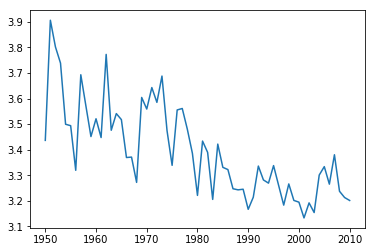

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
movies_year_stat = movies_year_stat[movies_year_stat.year != 1900].sort_values('year')
plt.plot(movies_year_stat.year, movies_year_stat.rating)

In [22]:
# Вывод: Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". - Подтверждается